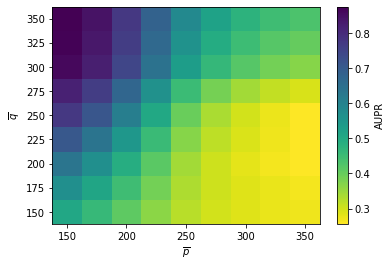

(81,)


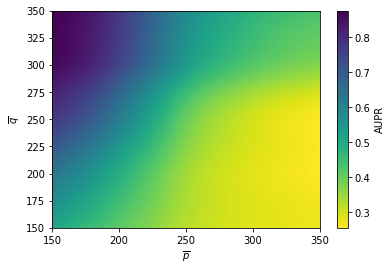

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

#https://zhuanlan.zhihu.com/p/567780409
def expend_data(x, y, z, smooth_degree=10):
    num_x = len(x)
    max_x = np.max(x)
    min_x = np.min(x)

    num_y = len(y)
    max_y = np.max(y)
    min_y = np.min(y)

    X, Y = np.meshgrid(x, y)
    coordinates = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))
    print(z.shape)

    m = np.linspace(min_x, max_x, (num_x - 1) * smooth_degree + 1)
    n = np.linspace(min_y, max_y, (num_y - 1) * smooth_degree + 1)
    M, N = np.meshgrid(m, n)

    U = griddata(coordinates, z, (M, N), method='cubic')

    return M, N, U


if __name__ == '__main__':
    x = np.array(([150, 175, 200, 225, 250, 275, 300, 325, 350]))
    y = np.array(([150, 175, 200, 225, 250, 275, 300, 325, 350]))
    z = np.array([[0.507067471, 0.570174817, 0.635770792, 0.706763597, 0.77519017, 0.819364808, 0.862573763,
                   0.871365193, 0.875889522, ],
                  [0.461232937, 0.512341365, 0.569369139, 0.63826165, 0.71057991, 0.764613135, 0.823064817, 0.836847285,
                   0.844587684, ],
                  [0.410245938, 0.447734625, 0.489541801, 0.547175077, 0.612922202, 0.673675368, 0.745485201,
                   0.764860895, 0.776526081, ],
                  [0.364281568, 0.387722013, 0.413491455, 0.45536912, 0.505308574, 0.563924923, 0.642840766,
                   0.666947675, 0.682815679, ],
                  [0.321483452, 0.332769451, 0.341396943, 0.367380548, 0.396879421, 0.452678737, 0.532993409,
                   0.562000488, 0.583083169, ],
                  [0.298401543, 0.303269547, 0.302993397, 0.318248665, 0.334684402, 0.384343486, 0.462836323,
                   0.494281588, 0.518477202, ],
                  [0.285842191, 0.28684636, 0.281560418, 0.290319725, 0.297629009, 0.342315718, 0.418436327,
                   0.450500599, 0.476640305, ],
                  [0.277530181, 0.275772795, 0.267023014, 0.27182259, 0.273080843, 0.313456661, 0.387616952,
                   0.420259579, 0.447777501, ],
                  [0.27078468, 0.26714822, 0.256064486, 0.25788017, 0.255894254, 0.294104561, 0.369083995, 0.403355939,
                   0.432591999, ],
                  ])

    # 普通热力图
    xx, yy = np.meshgrid(x, y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(xx, yy, z.T, cmap='viridis_r')
    fig.colorbar(c, ax=ax, label='AUPR')
    plt.xlabel(r'$\overline{p}$')
    plt.ylabel(r'$\overline{q}$')
    plt.savefig('heatmap1.tif', dpi=300)
    plt.show()

    # 彩虹热力图
    M, N, U = expend_data(x, y, z.ravel(), smooth_degree=100)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(M, N, U.T, cmap='viridis_r')
    fig.colorbar(c, ax=ax, label='AUPR')
    plt.xlabel(r'$\overline{p}$')
    plt.ylabel(r'$\overline{q}$')
    plt.savefig('heatmap2.tif', dpi=300)
    plt.show()